# Medical Data Visualizer

In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

# Data description

The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

File name: medical_examination.csv

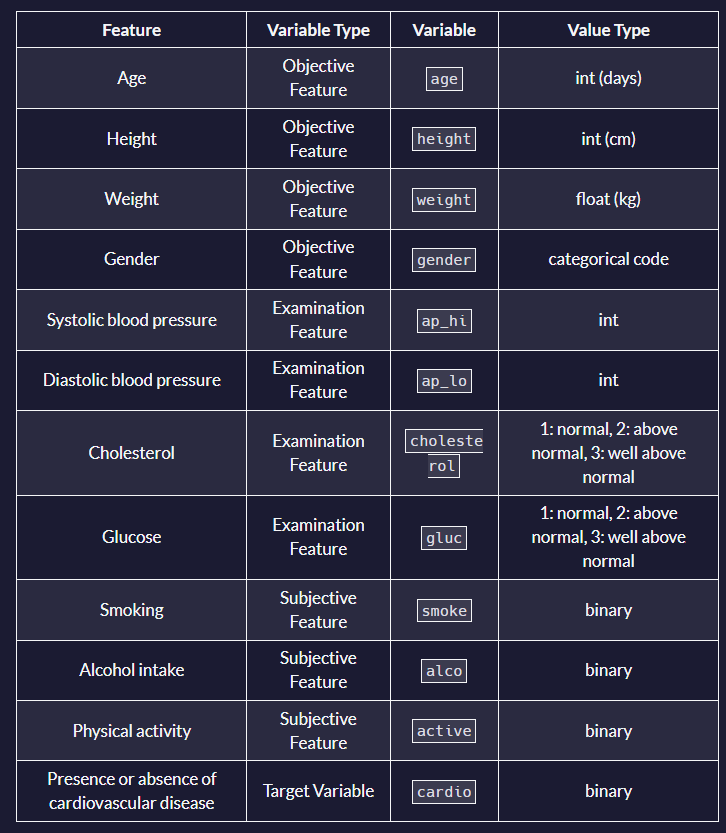

# Tasks

Create a chart similar to **examples/Figure_1.png**, where we show the counts of good and bad outcomes for the **cholesterol**, **gluc**, **alco**, **active**, and **smoke** variables for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks:

Add an **overweight** column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
Normalize the data by making 0 always good and 1 always bad. If the value of **cholesterol** or **gluc** is 1, make the value 0. If the value is more than 1, make the value 1.
Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's **catplot()**. The dataset should be split by 'Cardio' so there is one chart for each **cardio** value. The chart should look like **examples/Figure_1.png**.
Clean the data. Filter out the following patient segments that represent incorrect data:
diastolic pressure is higher than systolic (Keep the correct data with **(df['ap_lo'] <= df['ap_hi'])**)
height is less than the 2.5th percentile (Keep the correct data with **(df['height'] >= df['height'].quantile(0.025))**)
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile
Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's **heatmap()**. Mask the upper triangle. The chart should look like **examples/Figure_2.png**.

# Figures

**Figure 1**
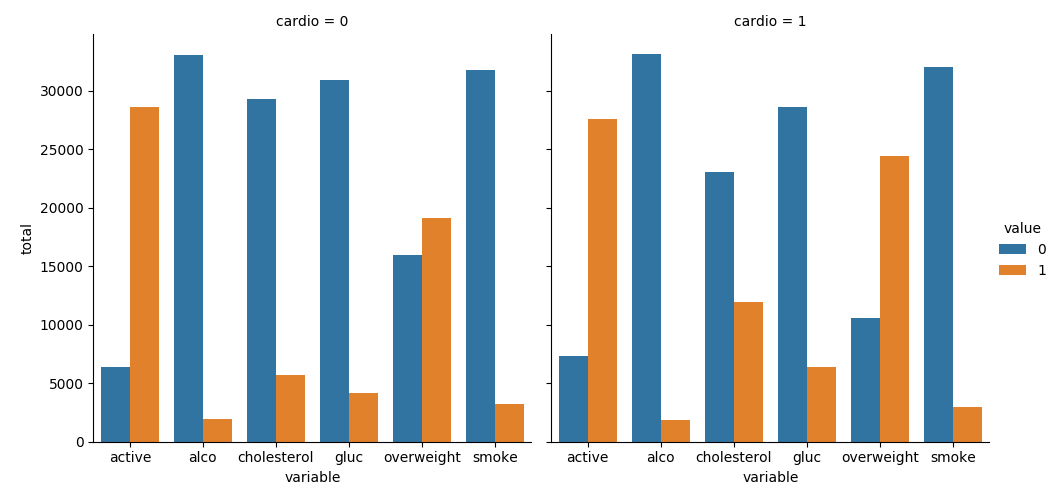

**Figure 2**

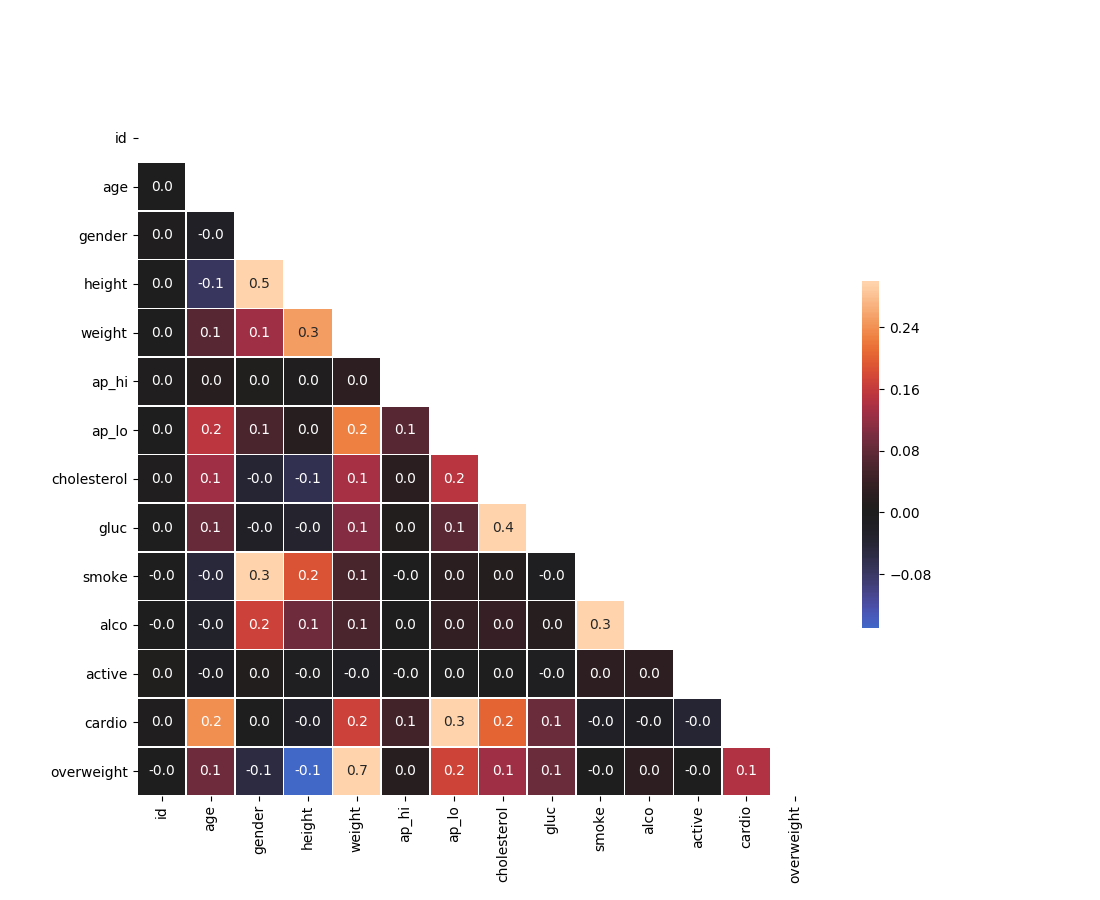

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Importing  data
df = pd.read_csv('medical_examination.csv')

# Adding 'overweight' column
df['overweight'] =  df['weight'] / np.square((df['height'] * 0.01))
df['overweight'] =   df['overweight'] > 25.0
df['overweight'] = df['overweight'].replace({True: 1, False: 0})


# Normalizing data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, the value is made 0. If the value is more than 1, the value is made 1.
df['cholesterol'] =   df['cholesterol'] > 1
df['cholesterol'] =   df['cholesterol'].replace({True: 1, False: 0})

df['gluc'] =   df['gluc'] > 1
df['gluc'] =   df['gluc'].replace({True: 1, False: 0})


# Drawing Categorical Plot
def draw_cat_plot():
    # Creating DataFrame for cat plot using `pd.melt` and using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df,value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active','overweight'])

    # Grouping and reformating the data to split it by 'cardio' and showing the counts of each feature..
    df_cat = pd.melt(df,id_vars=['cardio'],value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active','overweight'])

    # Initialising required variables
    features_list = ['active', 'alco','cholesterol','gluc','overweight', 'smoke']
    columns = ['cardio','variable','value','total']
    data = []

    #Looping to calculate counts of each feature
    # cardio value : 0 or 1
    for cardio_val in range(0,2) :
      for feature in features_list :
        for index in range(0,2) :
          # calculating total
          feature_count = len( df_cat[ (df_cat["cardio"] == cardio_val) & (df_cat["variable"] == feature) & (df_cat["value"] == index) ] )
          # [cardio,variable,value,total]
          data.append([cardio_val,feature,index,feature_count])

    df_cat_plot = pd.DataFrame(data = data,columns = columns)


    # Drawing the catplot 
    plot = sns.catplot(data=df_cat_plot, x="variable", y="total", col="cardio", hue="value",kind="bar", height=4, aspect=1.2,
    )

    # Getting the figure for the output
    fig = plot


    # Saving the plot
    fig.savefig('catplot.png')
    return fig


# Drawing Heat Map
def draw_heat_map():
    #==== Cleaning  the data ===
    # Duplicating original df
    df_copy = df.copy()
    # Droping unwanted conditions
    df_copy.drop(df_copy[df_copy['ap_lo'] > df_copy['ap_hi']].index, inplace = True)
    df_copy.drop(df_copy[df_copy['height'] < df_copy['height'].quantile(0.025)].index, inplace = True)
    df_copy.drop(df_copy[df_copy['height'] > df_copy['height'].quantile(0.975)].index, inplace = True)
    df_copy.drop(df_copy[df_copy['weight'] < df_copy['weight'].quantile(0.025)].index, inplace = True)
    df_copy.drop(df_copy[df_copy['weight'] > df_copy['weight'].quantile(0.975)].index, inplace = True)

    df_heat = df_copy

    # Calculating the correlation matrix
    corr = df_heat.corr(numeric_only=False)

    # Generating a mask for the upper triangle
    mask = np.triu(np.ones_like(corr,dtype=bool))


    # Setting up the matplotlib figure
    fig, ax = plt.subplots(figsize=(18, 6))

    # Drawing the heatmap 
    sns.heatmap(corr,annot=True,fmt=".2f",mask=mask)


    # Saving the plot
    fig.savefig('heatmap.png')
    return fig

draw_cat_plot()

draw_heat_map()